Assignment-1:

The aim of this assignment is to work on kaggle survey responses and predict the salary range of the data scientists based on the important features selected from the responses.

# 1. Importing required libraries and Creating DataSet

In [432]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sm
from scipy import stats
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#To show plots inline in notebooks
%matplotlib inline 



# 2. Reading Data

In [433]:
#Read the data file which is in the CSV format and save it in dataframe survey
survey = pd.read_csv('Kaggle_Salary.csv',skiprows=[1])

In [434]:
#observe the 5 rows of the dataframe#
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
1,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
2,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
3,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6,"60,000-69,999"
4,529,22-24,Male,-1,India,Master’s degree,Data Scientist,-1,50-249 employees,20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,"10,000-19,999"


In [435]:
#attribute of the dataframe(rows*columns)
survey.shape

(12496, 248)

In [436]:
survey.describe()

,Time from Start to Finish (seconds),Q2_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,...,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q10_Encoded
count,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,...,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000,12496.000000
mean,14187.604673,-0.963188,29.219350,-0.250880,8.104193,20.659731,25.924696,4.304257,3.934699,262.443182,...,-0.959027,-0.960147,0.147087,-0.432058,-0.024408,-0.075384,-0.396927,-0.762644,0.084507,3.920134
std,72869.192324,0.978564,122.212828,8.257454,51.451267,101.730628,119.962317,33.045994,31.521097,615.587887,...,0.969524,0.932287,10.517820,6.495483,9.436740,9.187884,6.270833,3.395428,9.676094,4.188575
min,67.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,448.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,636.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,1054.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,56.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000
max,843612.000000,39.000000,877.000000,137.000000,491.000000,812.000000,935.000000,366.000000,337.000000,2840.000000,...,35.000000,31.000000,162.000000,113.000000,143.000000,142.000000,108.000000,74.000000,144.000000,14.000000


In [437]:
#check column Q10 as it is the output variable

survey.groupby(['Q10']).Q10.count()

Q10
$0-999             1513
1,000-1,999         599
10,000-14,999       833
100,000-124,999     750
125,000-149,999     483
15,000-19,999       529
150,000-199,999     434
2,000-2,999         390
20,000-24,999       526
200,000-249,999     165
25,000-29,999       482
250,000-299,999      65
3,000-3,999         305
30,000-39,999       727
300,000-500,000      74
4,000-4,999         289
40,000-49,999       719
5,000-7,499         536
50,000-59,999       704
60,000-69,999       576
7,500-9,999         408
70,000-79,999       524
80,000-89,999       405
90,000-99,999       377
> $500,000           83
Name: Q10, dtype: int64

In [438]:
# the buckets were properly clubbed and stated in column Q10_buckets
survey.groupby(['Q10_buckets']).Q10_buckets.count()


Q10_buckets
0-9,999             4040
10,000-19,999       1362
100,000-124,999      750
125,000-149,9991     483
150,000-199,999      434
20,000-29,999       1008
200,000-249,999      165
30,000-39,999        727
40,000-49,999        719
50,000-59,999        704
60,000-69,999        576
70,000-79,999        524
80,000-89,999        405
90,000-99,999        377
>250,000             222
Name: Q10_buckets, dtype: int64

In [439]:
#there was typing error in the  Q10_buckets so checking for null values if any#
survey['Q10_buckets'].isnull().sum()

0

In [440]:
survey.Q3.isnull().sum()


0

# 3. Data Cleaning:Dealing with Nan

Dropping rows that are not important to our analysis, rows with missing values. Data cleaning is the necessary part of the analysis as the data from public source or surveys conducted will have lot of unwanted information, fake responses that are not relaiable. Proper cleaning will reduce over fitting, reduce computational time. Also, it eases the ML model to predict the output in a better way

#Some respondents has age less than number of years of experience and to be ambiguous#

In [441]:
survey[(survey["Q15"]=='20+ years')& (survey['Q1']=="18-21")]


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
287,585,18-21,Male,-1,India,Master’s degree,Business Analyst,-1,0-49 employees,3-4,...,NaN,NaN,AWS DynamoDB,Azure SQL Database,NaN,NaN,NaN,-1,13,"200,000-249,999"
10281,384,18-21,Male,-1,United States of America,I prefer not to answer,Data Scientist,-1,50-249 employees,3-4,...,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,-1,11,"125,000-149,9991"


In [442]:
survey[(survey["Q15"]=='20+ years')& (survey['Q1']=="22-24")]

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
10719,498484,22-24,Male,-1,Egypt,Bachelor’s degree,Data Engineer,-1,0-49 employees,5-9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,14,">250,000"
11901,180,22-24,Male,-1,India,Bachelor’s degree,Other,-1,"1000-9,999 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"


In [443]:
remove_rows=survey[(survey['Q15']=='20+ years') & (survey['Q1']=="18-21")]
remove_rows=remove_rows.append(survey[(survey['Q15']=='20+ years') & (survey['Q1']=="22-24")])

survey=survey.drop(remove_rows.index,axis=0)
survey.shape


(12492, 248)

People who has 70+ age and prefered not to answer is in >250000 salary bucket so delete those rows

In [444]:
rows=survey[(survey['Q1']=='70+')&(survey['Q4']=='I prefer not to answer')]
survey=survey.drop(rows.index,axis=0)
survey.shape

(12486, 248)

In [445]:
survey=survey.reset_index()
survey=survey.drop(['index'],axis=1)

In [446]:
survey.loc[0:,'index'] = survey.index

Dropping the columns with Values that are encoded and cannot be interpreted to be able to use them for data analysis

In [447]:
#Droping the columns with "_OTHER_TEXT" and also Q7 as it has many irrelevant answer values and Time from start to Finish,Q10
#already bucketed

survey.drop(survey[[col for col in survey.columns if '_TEXT' in col]],axis=1,inplace=True)
survey.drop(['Q7','Time from Start to Finish (seconds)',"Q10",'Q11'],axis=1,inplace=True)
survey.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q9_Part_1', 'Q9_Part_2',
       'Q9_Part_3',
       ...
       'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10',
       'Q34_Part_11', 'Q34_Part_12', 'Q10_Encoded', 'Q10_buckets', 'index'],
      dtype='object', length=217)

In [448]:
survey1=survey.iloc[:,np.r_[0:217]].copy()
survey1.info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 217 columns):
Q1             12486 non-null object
Q2             12486 non-null object
Q3             12486 non-null object
Q4             12486 non-null object
Q5             12486 non-null object
Q6             12486 non-null object
Q8             12486 non-null object
Q9_Part_1      5976 non-null object
Q9_Part_2      3505 non-null object
Q9_Part_3      4888 non-null object
Q9_Part_4      3283 non-null object
Q9_Part_5      3631 non-null object
Q9_Part_6      2301 non-null object
Q9_Part_7      514 non-null object
Q9_Part_8      239 non-null object
Q12_Part_1     2781 non-null object
Q12_Part_2     1383 non-null object
Q12_Part_3     2401 non-null object
Q12_Part_4     7752 non-null object
Q12_Part_5     2815 non-null object
Q12_Part_6     5113 non-null object
Q12_Part_7     1642 non-null object
Q12_Part_8     7328 non-null object
Q12_Part_9     3490 non-null object
Q12_Part_10    1879 n

Dropping columns that are recommendations and opnions of the respondents which cannot contribute to salary.

In [449]:
survey.drop(["Q19"],axis=1,inplace=True)



In [450]:
survey.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets,index
0,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees","We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999",0
1,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",I do not know,NaN,NaN,NaN,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,14,">250,000",1
2,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,No (we do not use ML methods),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"0-9,999",2
3,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,"We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,6,"60,000-69,999",3
4,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"10,000-19,999",4


### Imputing missing values and Encoding the columns

Most of the Information irrelevant to the analysis is removed.We observe that they are many missing values.
To deal with missing values we have two categories of questions,multiple choice answers and single choice answers
we split that data corresponding to separate responses to deal with missing values by comparing those features with target data.




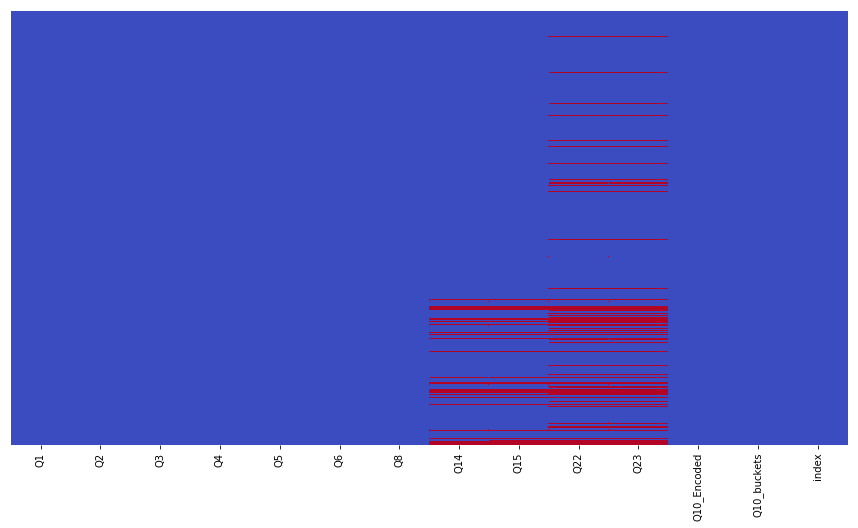

In [451]:
one_response=survey[[col for col in survey.columns if '_Part' not in col]]
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(one_response.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [452]:
#calculate the %  of missing values to decide imputation
for col in ['Q14','Q15','Q22','Q23']:
    print("Missing values of column" + col + ' ' +'is'+' ' + str(one_response[col].isnull().sum()/len(one_response)*100)+'%')

Missing values of columnQ14 is 8.353355758449462%
Missing values of columnQ15 is 8.593624859843024%
Missing values of columnQ22 is 15.569437770302738%
Missing values of columnQ23 is 15.641518500720808%


In [453]:
#Data visualization tools are not choosen by people working at high level so we impute "other" as 
#some high level choices were not provided to the respondents 
one_response[one_response['Q14'].isna()]['Q5'].value_counts()

Software Engineer          242
Data Scientist             227
Other                      137
Data Analyst               116
Research Scientist         101
Business Analyst            71
Data Engineer               57
Product/Project Manager     51
Statistician                24
DBA/Database Engineer       17
Name: Q5, dtype: int64

In [454]:
import warnings
one_response['Q14'].fillna('Other',inplace=True)
warnings.filterwarnings("ignore")

In [455]:
one_response.groupby("Q14").sum()

,Q10_Encoded,index
Q14,,
"Advanced statistical software (SPSS, SAS, etc.)",3226,4275622
"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",5867,12641272
"Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",3343,4663002
"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",5777,5855316
"Local development environments (RStudio, JupyterLab, etc.)",24071,34734181
Other,6627,15774462


In [456]:
#People who left programming years column blank are people in low salary bucket but are showing high job positions 
# and their data is also missing in the machine learning methods so they are students(observe from age) impute" I have never coded"

one_response[one_response['Q15'].isna()].Q5.value_counts(),one_response[one_response['Q15'].isna()].Q10_buckets.value_counts(),one_response[one_response['Q15'].isna()].Q1.value_counts()

(Software Engineer          251
 Data Scientist             232
 Other                      141
 Data Analyst               121
 Research Scientist         102
 Business Analyst            71
 Data Engineer               60
 Product/Project Manager     52
 Statistician                25
 DBA/Database Engineer       18
 Name: Q5, dtype: int64, 0-9,999             516
 10,000-19,999        91
 20,000-29,999        70
 50,000-59,999        49
 30,000-39,999        47
 100,000-124,999      47
 40,000-49,999        42
 60,000-69,999        39
 70,000-79,999        30
 90,000-99,999        29
 150,000-199,999      28
 >250,000             27
 125,000-149,9991     23
 80,000-89,999        22
 200,000-249,999      13
 Name: Q10_buckets, dtype: int64, 25-29    280
 22-24    182
 30-34    155
 35-39    117
 40-44     88
 18-21     69
 45-49     67
 50-54     53
 55-59     31
 60-69     24
 70+        7
 Name: Q1, dtype: int64)

In [457]:
one_response['Q15'].fillna('I have never written code',inplace=True)
one_response.isnull().sum()

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q8                0
Q14               0
Q15               0
Q22            1944
Q23            1953
Q10_Encoded       0
Q10_buckets       0
index             0
dtype: int64

In [458]:
one_response[one_response['Q23'].isna()].Q5.value_counts(),one_response[one_response['Q23'].isna()].Q10_buckets.value_counts(),one_response[one_response['Q23'].isna()].Q1.value_counts()

(Software Engineer          463
 Data Scientist             335
 Other                      320
 Data Analyst               222
 Research Scientist         169
 Business Analyst           158
 Product/Project Manager    118
 Data Engineer               86
 Statistician                54
 DBA/Database Engineer       28
 Name: Q5, dtype: int64, 0-9,999             946
 10,000-19,999       193
 20,000-29,999       135
 30,000-39,999        85
 50,000-59,999        81
 100,000-124,999      78
 40,000-49,999        78
 60,000-69,999        60
 >250,000             52
 70,000-79,999        51
 90,000-99,999        51
 150,000-199,999      45
 80,000-89,999        42
 125,000-149,9991     36
 200,000-249,999      20
 Name: Q10_buckets, dtype: int64, 25-29    476
 30-34    308
 22-24    302
 35-39    233
 40-44    176
 45-49    127
 18-21    117
 50-54     99
 55-59     55
 60-69     46
 70+       14
 Name: Q1, dtype: int64)

In [459]:
one_response[one_response['Q22'].isna()].Q5.value_counts(),one_response[one_response['Q22'].isna()].Q10_buckets.value_counts(),one_response[one_response['Q22'].isna()].Q1.value_counts(),one_response[one_response['Q22'].isna()].Q3.value_counts()

(Software Engineer          459
 Data Scientist             333
 Other                      320
 Data Analyst               221
 Research Scientist         169
 Business Analyst           157
 Product/Project Manager    117
 Data Engineer               86
 Statistician                54
 DBA/Database Engineer       28
 Name: Q5, dtype: int64, 0-9,999             943
 10,000-19,999       193
 20,000-29,999       135
 30,000-39,999        85
 50,000-59,999        81
 100,000-124,999      78
 40,000-49,999        77
 60,000-69,999        59
 >250,000             52
 90,000-99,999        51
 70,000-79,999        49
 150,000-199,999      44
 80,000-89,999        42
 125,000-149,9991     36
 200,000-249,999      19
 Name: Q10_buckets, dtype: int64, 25-29    475
 30-34    307
 22-24    300
 35-39    231
 40-44    176
 45-49    127
 18-21    116
 50-54     98
 55-59     54
 60-69     46
 70+       14
 Name: Q1, dtype: int64, India                                                   558
 United S

In [460]:
#Impute Q23 with "0 years" and 'Q22" with "Never"as most of them are either software engineers or new college students. #
#observe they are in low salary buckets and most of them are from USA,confirms they are aspiring students#
one_response['Q23'].fillna('0 years',inplace=True)
one_response['Q22'].fillna('Never',inplace=True)


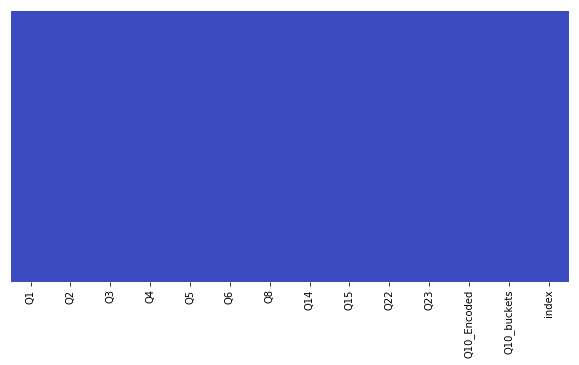

In [461]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(one_response.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

Secondly we deal with multiple answer set as the set is alreay available in long form where the nan and 1 value are existing in a coloumn. Upon checking the unique values in each column, we replace NaN values by '0' and the other value by '1'

In [462]:
multi_response=survey[[col for col in survey.columns if '_Part' in col]]
multi_response.head()

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,...,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
0,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,Do research that advances the state of the art...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN
4,Analyze and understand data to influence produ...,NaN,NaN,NaN,Experimentation and iteration to improve exist...,Do research that advances the state of the art...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
for i in multi_response.columns:
    print(i,multi_response[i].unique())

Q9_Part_1 ['Analyze and understand data to influence product or business decisions'
 nan]
Q9_Part_2 ['Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data'
 nan]
Q9_Part_3 ['Build prototypes to explore applying machine learning to new areas' nan]
Q9_Part_4 ['Build and/or run a machine learning service that operationally improves my product or workflows'
 nan]
Q9_Part_5 [nan 'Experimentation and iteration to improve existing ML models']
Q9_Part_6 [nan 'Do research that advances the state of the art of machine learning']
Q9_Part_7 [nan 'None of these activities are an important part of my role at work']
Q9_Part_8 [nan 'Other']
Q12_Part_1 [nan 'Twitter (data science influencers)']
Q12_Part_2 [nan 'Hacker News (https://news.ycombinator.com/)']
Q12_Part_3 [nan 'Reddit (r/machinelearning, r/datascience, etc)']
Q12_Part_4 ['Kaggle (forums, blog, social media, etc)' nan]
Q12_Part_5 [nan 'Course Forums (forums.fast.ai, etc)']
Q12_Part_

In [464]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
for col in multi_response.columns:
    multi_response[col]=multi_response[col].apply(lambda x: 0 if pd.isnull(x) else 1 )

In [465]:
multi_response.head()

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,...,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


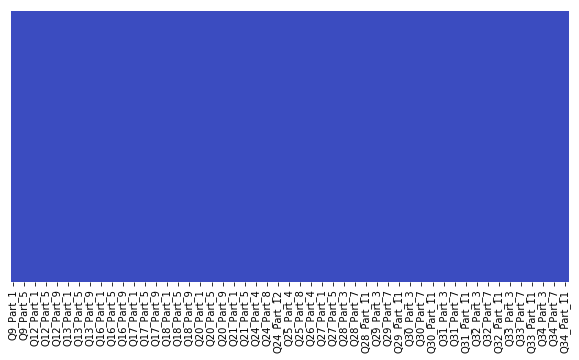

In [466]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(multi_response.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

After the Data is clean we need to ready the Data according to the logistic regression
Categorical variables are converted to Numerical to make it ready as input.
One of the ideas can be giving numerical values but by doing this we have to give order of relationship between interval values, so I decided to use encoding using dummy variables
After dummy variables are created use one hot encoding  for (1 if yes for that variable and 0 for No to that variable)

In [467]:
one_response.shape,multi_response.shape


((12486, 14), (12486, 202))

In [468]:
one_response_encoded=pd.get_dummies(one_response.drop(['index','Q10_buckets','Q10_Encoded'],axis=1))

In [469]:
one_response_encoded.head()

,Q1_18-21,Q1_22-24,Q1_25-29,Q1_30-34,Q1_35-39,Q1_40-44,Q1_45-49,Q1_50-54,Q1_55-59,Q1_60-69,...,Q22_Once,Q23_0 years,Q23_1-2 years,Q23_10-15 years,Q23_2-3 years,Q23_20+ years,Q23_3-4 years,Q23_4-5 years,Q23_5-10 years,Q23_< 1 years
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### After Encoded data is available now Merging two dataframes(one_response_encoded and multi_response)

In [470]:
feature_input=pd.concat([multi_response,one_response_encoded],axis=1)
feature_input.columns

Index(['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5',
       'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q12_Part_1', 'Q12_Part_2',
       ...
       'Q22_Once', 'Q23_0 years', 'Q23_1-2 years', 'Q23_10-15 years',
       'Q23_2-3 years', 'Q23_20+ years', 'Q23_3-4 years', 'Q23_4-5 years',
       'Q23_5-10 years', 'Q23_< 1 years'],
      dtype='object', length=331)

In [471]:
#Target data is laredy encoded
target_output=one_response['Q10_Encoded']
target_output.shape

(12486,)

# 3.Exploratory Data Analysis

#### Data to plot in X and Y variable for plotting

In [472]:
x_variable=one_response.drop(['Q10_Encoded','index','Q10_buckets'],axis=1)


#### Age Vs Salary

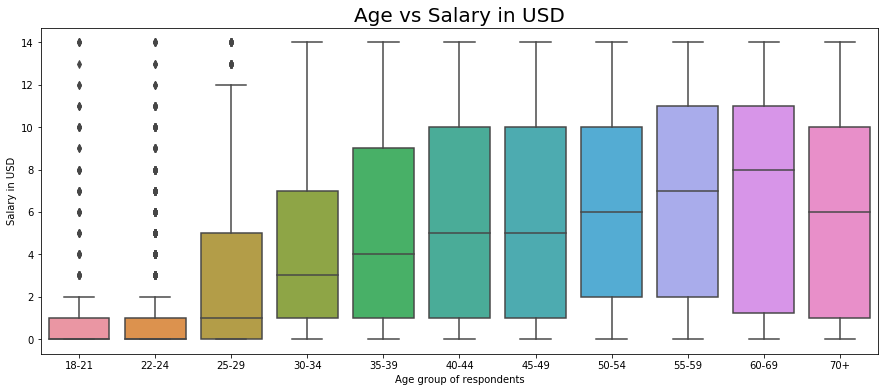

In [473]:

fig,ax1 = plt.subplots (figsize=(15,6))
age_salary=sns.boxplot(x=x_variable['Q1'].sort_values(),y=target_output)
age_salary.set(xlabel='Age group of respondents',ylabel='Salary in USD')

age_salary.axes.set_title('Age vs Salary in USD', fontsize=20)
plt.show()


It is observed that age is an important factor in deducing salary class the range of salary is high for people in their
40-49 interval and highest in 60-69 interval. 
It is also to be noted that  maximum number of respondents in high salary buckets are in the age interval of  40-49

### Profession Vs Salary

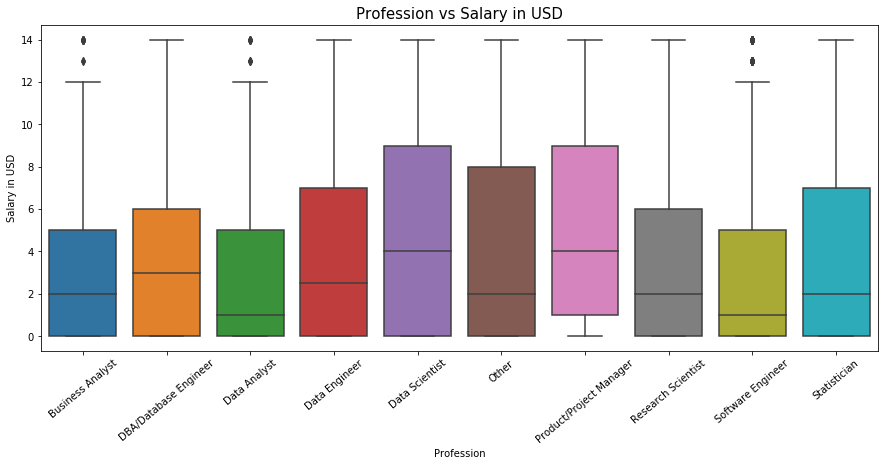

In [474]:

fig,ax2 = plt.subplots (figsize=(15,6))
job_salary=sns.boxplot(x=x_variable['Q5'].sort_values(),y=target_output)
job_salary.set(xlabel='Profession',ylabel='Salary in USD')

job_salary.axes.set_title('Profession vs Salary in USD', fontsize=15)
job_salary.set_xticklabels(job_salary.get_xticklabels(),rotation=40)
plt.show()

It is clearly evident that people who are aspiring/working as Data scientist have high salaries with highest range.

#### Country Vs Salary

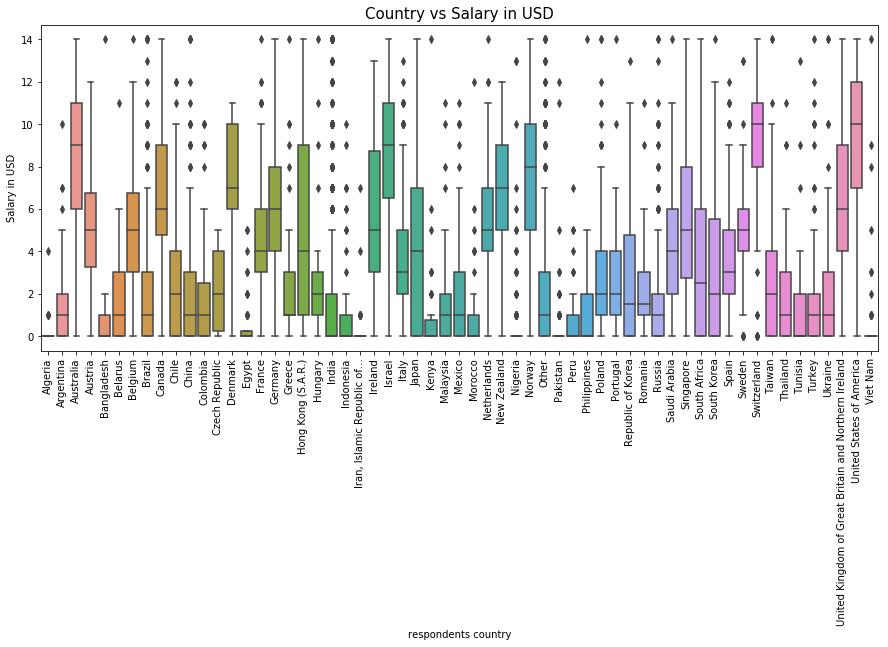

In [475]:
fig,ax3 = plt.subplots (1,figsize=(15,6))
coun_sal=sns.boxplot(x=x_variable['Q3'].sort_values(),y=target_output,ax=ax3)
coun_sal.set(xlabel= 'respondents country',ylabel='Salary in USD')

coun_sal.set_xticklabels(coun_sal.get_xticklabels(),rotation=90)
coun_sal.axes.set_title('Country vs Salary in USD', fontsize=15)
plt.show()

In [476]:
The survey have respondent from many countries but people from USA are earning more with high salaries

SyntaxError: invalid syntax (<ipython-input-476-0a955a924f3e>, line 1)

#### Understanding Y( salary)

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(target_output,bins=15, label=str)
plt.xlabel('Salary in USD')

plt.title('Distribution of Salary',size=16)
plt.show()

Most of the respondents are in the salary class-0

Age feature and Profession are very good indicators in predictinig salary class. 
salaries vary with country ,people in USA has the highest salary.

# 4.Feature selection

The best technique to check the relation between  the features (X) and target variable(Y) is to get correlation matrix.

Correlation matrix gives an idea whether variables is positively/negatively correlated.

The problem is that the  data has to  be encoded as it is categorical ,so has to be numerical for calculations of covariance
We will consider the features of one_response and target in a dataframe to do that.
The covariance matrix  though cannot be used for actual feature selection because ordered features are there but can be used in understanding the effect the features have on the target.



In [477]:
# Importing label encoder 
from sklearn import preprocessing 
  
# label_encoder object understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

one_response_label=one_response.drop(['Q10_buckets','index'],axis=1)
one_response_label.columns



Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q14', 'Q15', 'Q22', 'Q23',
       'Q10_Encoded'],
      dtype='object')

In [478]:
# Encode labels in column 'species'. 
order=['Q1','Q4','Q15','Q22','Q23','Q10_Encoded'] #columns where the order is to be intact (numericals)
one_response_label=[label_encoder.fit_transform(one_response_label[col]) for col in one_response_label.columns if col not in order]

In [479]:
one_response_label

[array([1, 1, 1, ..., 1, 1, 1]),
 array([20,  2, 20, ..., 20, 20, 15]),
 array([8, 5, 5, ..., 5, 9, 8]),
 array([4, 4, 0, ..., 2, 3, 4]),
 array([3, 0, 1, ..., 0, 4, 3]),
 array([3, 4, 4, ..., 4, 5, 4])]

In [480]:
col_names=pd.concat([one_response.drop(['index','Q1','Q4','Q15','Q22','Q23','Q10_buckets','Q10_Encoded'],axis=1)],axis=1).columns
one_response_label=pd.DataFrame(one_response_label)
one_response_label=one_response_label.transpose()
one_response_label.columns=col_names


The columns which have order are to be encoded manually using map function

In [481]:
one_response_label.columns

Index(['Q2', 'Q3', 'Q5', 'Q6', 'Q8', 'Q14'], dtype='object')

In [482]:
#Encoding columns with numericals where order is to be considered
one_response_label['Q1']=one_response['Q1'].map({'18-21': 0, '22-24': 1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-69':9, '70+':10}).astype(int)
one_response_label['Q4']=one_response['Q4'].map({'Bachelor’s degree': 0, 'Master’s degree': 1, 'Doctoral degree':2, 'Professional degree':3, 'Some college/university study without earning a bachelor’s degree':4, 'I prefer not to answer':5, 'No formal education past high school':6}).astype(int)
one_response_label['Q15']=one_response['Q15'].map({'I have never written code':0, '< 1 years':1, '1-2 years':2, '3-5 years':3, '5-10 years':4, '10-20 years':5, '20+ years':6})
one_response_label['Q6']=one_response['Q6'].map({'0-49 employees':0, '50-249 employees ':1, '250-999 employees':2, '1000-9,999 employees':3, '> 10,000 employees':4})
one_response_label['Q22']=one_response['Q22'].map({'Never':0, 'Once':1, '2-5 times':2, '6-24 times':3, '> 25 times':4}).astype(int)
one_response_label['Q23']=one_response['Q23'].map({'0 years':0, '< 1 years':1, '1-2 years':2, '2-3 years':3, '3-4 years':4, '4-5 years':5, '5-10 years':6, '10-15 years':7, '20+ years':8})
one_response_label['Q10_Encoded']=one_response['Q10_Encoded']
one_response_label.head()

,Q2,Q3,Q5,Q6,Q8,Q14,Q1,Q4,Q15,Q22,Q23,Q10_Encoded
0,1,20,8,4.0,3,3,5,3,0,0,0,0
1,1,2,5,4.0,0,4,5,1,2,1,3,14
2,1,20,5,0.0,1,4,1,0,1,0,1,0
3,1,15,4,0.0,3,0,7,1,6,0,7,6
4,1,20,4,NaN,2,4,1,1,3,3,3,1


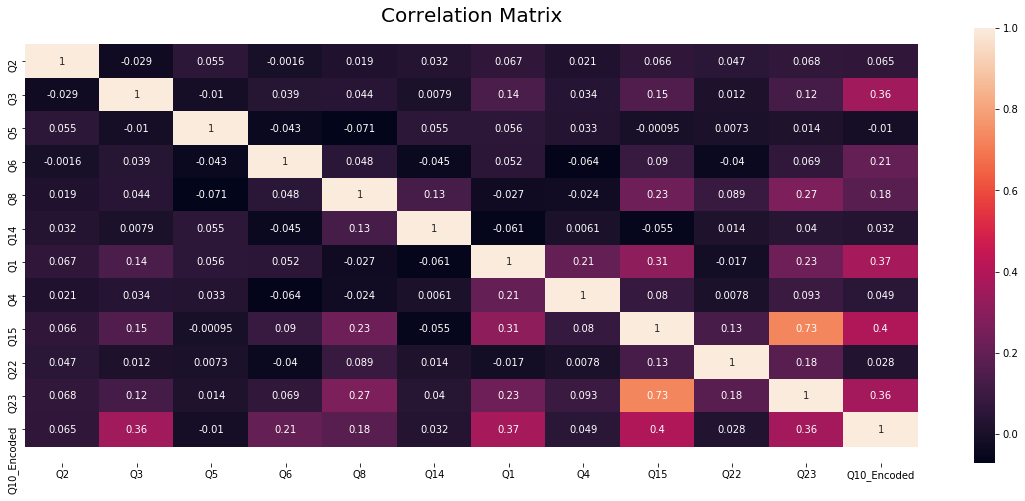

In [483]:
df_cor=one_response_label.corr()
plt.figure(figsize=(20,8))
sns.heatmap(df_cor,xticklabels=df_cor.columns,yticklabels=df_cor.columns,annot=True)
plt.ylim(plt.ylim()[0]+0.5,plt.ylim()[1]-0.5) # update the ylim(bottom, top) values
plt.title('Correlation Matrix', fontsize=20)
plt.show()

It is observed from the correlation heatmap that correlation of target variable is good only with few features like age,country,coding experience and if the companies are incorporating ML techniques then Q23 is  also considered important

Correlation matrix is not the best technique to chose many features  so
Feature selection  is done based on some techniques.
Models used are

    1.Feature importance from Decision Tree Classifier is obtained beacause this classifier compares each feature with target variable and gives its importance.
    
    2.Random Forest Classifierfeature reduction is done based on purity of the node and returns the feature id's to be considered
    
    3.LASSO (least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization



Many Functions are  defined for easy implmentation and to maintain  order.


Function Name 1= Feature_selection 
   
Input=Feature data and target data 
  
Working=Features are selected 
  
Output=transformed Feature data
 
                

#### Feature_Selection Function:

In [556]:
#Takes feature selection type, feature and target data as inputs, perform feature section fit and transform the feature data
#The transformed feature data is passed to PCA (primary component analysis) and calling cross validation with new feature data

def feature_sel(X,y,model):
    if model=='FI':
        #Fitting the data into classifier
        clf = SelectFromModel(DecisionTreeClassifier(random_state=10))
        clf.fit(X, y)
        #Assigning the feature data
        f1=X[X.columns[clf.get_support()]]
        print('Feature data shape after fitting the model is {}'.format(f1.shape))
        #PCA and Checking the accuracy of model
        f1,variance=PCA(f1)
        X_train, X_test, y_train, y_test=CV(f1,y)
    elif model=='RF':
        #Fitting the data into classifier
        clf = SelectFromModel(RandomForestClassifier(n_estimators = 100,random_state=0))
        clf.fit(X, y)
        #Assigning the feature data
        f2=X[X.columns[clf.get_support()]]
        print('Feature data shape after fitting the model is {}'.format(f2.shape))
        #PCA and Checking the accuracy of model
        f2,variance=PCA(f2)
        X_train, X_test, y_train, y_test=CV_(f2,y)
    elif model=='LS':
        #Fitting the data into classifier
        #alpha is choosen to be 500 randomly after checking various accuracies, 
          #however tuning will be done and substituted by tuned parameter
        clf = SelectFromModel(Lasso(alpha=[0.01]).fit(X, y))
        clf.fit(X, y)
        #Assigning the feature data
        f3=X[X.columns[clf.get_support()]]
        print('Feature data shape after fitting the model is {}'.format(f3.shape))
        #PCA and Checking the accuracy of model
        f3,variance=PCA(f3)
        X_train, X_test, y_train, y_test=CV_(f3,y)
    return(variance,X_train, X_test, y_train, y_test)    

# 5. Model Implementation

After the  feature selection we use some classifier for further dimensionality reduction(primary component analysis).
There are two options possible one is to chose the number  of components and the other is we can set the variance of the input(obtained from generated components)

PCA function

Input=Transformed data from Feature_selection function

Working=Reducing the features(dimensionality reduction)

Output=Reduced feature data is obtained

In [538]:
#PCA is implmented on transformed feature data to give reduced dimensions
#returns: explained variance ratio=ratio between the variance of that principal component and the total variance

def PCA(X):
        
    from sklearn.decomposition import PCA
    pca = PCA(n_components=0.99) #Explained varience of 99% so n_components is 0.99
    pca.fit(X)
    X=pca.transform(X)
    print('Feature data shape after PCA  {}'.format(X.shape))
    return(X,np.cumsum(pca.explained_variance_ratio_))

Hyper parameter Tuning: Cross Validation

The aim is to obtain  a generalized model ,one which can predict accurately on test data.
Cross validation is a techniques used for tuning hyperparamters, in which the training set is divided into given number of folds and taking (k-1)folds for training and 1 fold for validating.we do this repeatedly k times and find optimal hyperparameters with high cross validation accuracy.Using these optimal hyperparameters we predict using the test data (which is never used on that model).

KFold Cross validation is used here.



In [539]:
#Dimensionally reduced  data from PCA is obtained.
#Use the split data Xtrain and Y train for Crossvalidation ,the Xtrain is divided into  given KFolds

# The Xtest is never used in his process.
def CV(X,y):
    
    scalar = StandardScaler()
    #splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3)
    #converting numpy arrays to DF
    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)
    y_train=pd.DataFrame(y_train)
    y_test=pd.DataFrame(y_test)
    
    model = LogisticRegression(C=0.1,solver='newton-cg',penalty='l2',multi_class='multinomial')
    
    kfold = KFold(n_splits=10)
    kfold.get_n_splits(X_train)
    
    #Initialising the values
    train_accuracy = np.zeros(10)
    test_accuracy = np.zeros(10)
    recall = np.zeros(10)
    precision = np.zeros(10)
    np_idx = 0

    for train_idx, test_idx in kfold.split(X_train):
        X_train_split, X_test_split = X_train.values[train_idx], X_train.values[test_idx]
        y_train_split, y_test_split = y_train.values[train_idx], y_train.values[test_idx]
    
        #Scaling the data sets since a lot of the models are based on the concept of Euclidean Distances 
        #so features with greater scales would have a greater impact on the solution, then those of smaller values.
        X_train_split = scalar.fit_transform(X_train_split)
        X_test_split= scalar.transform(X_test_split)
    
        model.fit(X_train_split, y_train_split)
        
        #predictions of the model against train/test data are stored
        test_predictions = model.predict(X_test_split)
        train_predictions = model.predict(X_train_split)
        
        #Calculating the required metrics to measure reliability of model
        CM=confusion_matrix(y_test_split, test_predictions)
        recall[np_idx] = np.mean(np.diag(CM) / np.sum(CM, axis = 1))
        precision[np_idx] = np.mean(np.diag(CM) / np.sum(CM, axis = 0))
        
        train_ACC=accuracy_score(y_train_split, train_predictions)
        test_ACC=accuracy_score(y_test_split, test_predictions)

        train_accuracy[np_idx] = train_ACC*100
        test_accuracy[np_idx] = test_ACC*100
        np_idx += 1
    
    print ("Average test Score: {}%({}%)".format(round(np.mean(test_accuracy),3),round(np.std(test_accuracy),3)))
    print ("Average train Score: {}%({}%)".format(round(np.mean(train_accuracy),3),round(np.std(train_accuracy),3)))
    print ("Average recall Score: {}%".format(round(np.mean(recall)*100,3)))
    print ("Average precision Score: {}%".format(round(np.mean(precision)*100,3)))
    print(model)
    plc(model, X_train, y_train, cv=10)
        
    
    return(X_train, X_test, y_train, y_test)

In [540]:
#For the validated models from Cross validation, we compute the train and test scores to plot the learning curve.
#Gets the estimator type and title, returns the plot of training score and test score against the no of observations

def plc(estimator, X, y, cv=10,ylim=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.title('Learning curve')

    plt.legend(loc="best")
    return plt

#### Model implementations using the above functions and function calls when needed.



The functions above are designed to have reusable code for future projects and clear results display but this task takes alot of time
and makes it very difficult to debug by an intermediate programmer.

Steps how the feature data and the target data passed as arguments and achieve results:
1.The feature data and target data is passed to the function name"Feature_selection"

2.Based on the model we choose for feature selection(FI,RF,LS) the features are transformed and send to PCA.

3.The dimensionally reduced features obtained from "PCA" function are then send for Cross validation"CV".

4.In KFold Cross Validation  method  the training set is split into k equal sizes. Then of the k subsamples, a single sample is used for testing, and the remaining k-1 samples are used for training. 
This process continues k times, and each time a different sample is used for validation. This results in each sample being validated once. At the end of this we get 10 accuracies for the model and, from this, we can get the cross validation scores, and the standard deviation of the scores. The higher the average accuracy, the lower the bias. The lower the standard deviation, the lower the variance.
This better represents the true performance of the model on the training set.

5.Print the crossvalidation accuracy,test accuracy,precision and recall to decide the[the model for feature selection]

# 1.Decision Tree Classifier-model

Feature data shape after fitting the model is (12486, 142)
Feature data shape after PCA  (12486, 128)
Average test Score: 34.714%(1.499%)
Average train Score: 40.767%(0.224%)
Average recall Score: 14.839%
Average precision Score: 16.626%
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


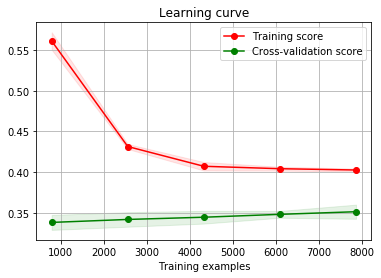

In [534]:
#Calling feature importance from decision tree and run the model to test the accuracy
fi_var,X_train_fi, X_test_fi, y_train_fi, y_test_fi=feature_sel(feature_input,target_output,'FI')

### 2.Random Forest Classifier

Feature data shape after fitting the model is (12486, 146)
Feature data shape after PCA  (12486, 132)
Average test Score: 34.748%(1.512%)
Average train Score: 40.661%(0.251%)
Average recall Score: 15.045%
Average precision Score: 16.443%


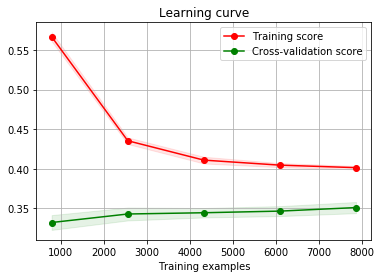

In [535]:
#Calling random forest classifier and run the model to test the accuracy
rf_var,X_train_rf, X_test_rf, y_train_rf, y_test_rf=feature_sel(feature_input,target_output,'RF')

### 3.LASSO

Feature data shape after fitting the model is (12486, 120)
Feature data shape after PCA  (12486, 106)
Average test Score: 35.824%(1.321%)
Average train Score: 40.482%(0.241%)
Average recall Score: 15.816%
Average precision Score: 18.723%


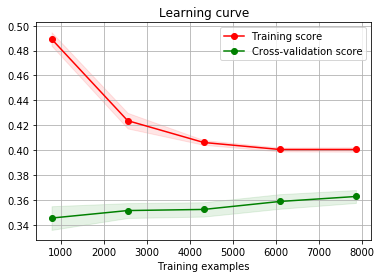

In [557]:
#Calling lasso logistic regression and run the model to test the accuracy
ls_var,X_train_ls, X_test_ls, y_train_ls, y_test_ls=feature_sel(feature_input,target_output,'LS')


The model selection through Lasso gives good accuracy and reduced dimensionality in comaparision to 3 models.
There also many choices to check other models for different accuracies by changing hyperparameters ,but only tried changing alpha
values for LASSO.

Therefore we choose LASSO model beacause of its dimensionality and so less computation time.


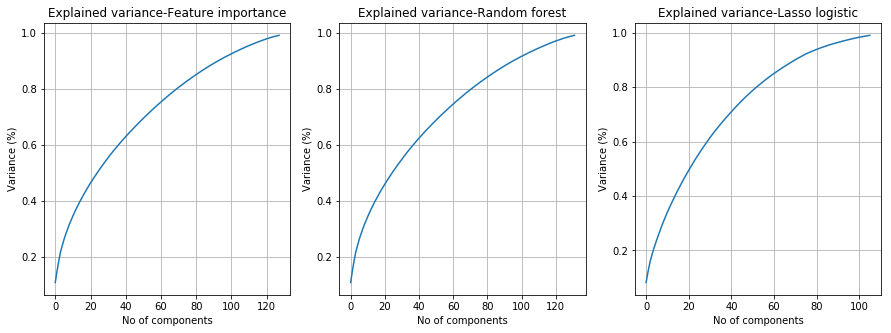

In [558]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))
ax1.plot(fi_var)
ax1.set_title('Explained variance-Feature importance')
ax2.plot(rf_var)
ax2.set_title('Explained variance-Random forest')
ax3.plot(ls_var)
ax3.set_title('Explained variance-Lasso logistic')

for ax in [ax1,ax2,ax3]:
    ax.set(xlabel='No of components', ylabel='Variance (%)')
    ax.grid()

The above plot are used to support the model selected as Lasso because other models needed 120 features to explain variance on the other hand LASSO needed 100 features


# 6. Model Tuning

In [563]:
best_clf = SelectFromModel(Lasso(alpha=[0.01]).fit(feature_input, target_output))
best_clf.fit(feature_input,target_output)

best_X=feature_input[feature_input.columns[best_clf.get_support()]]
       
best_X,variance=PCA(best_X)

#Random state is to be used as the same one used for cross validation tp maintain consistancy
X_train, X_test, y_train, y_test = train_test_split(best_X, target_output, random_state=4, test_size=0.3)

Feature data shape after PCA  (12486, 106)


In [ ]:
#Defining the models required
model = LogisticRegression(multi_class='multinomial')
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train)

#Initializing the arrays/objects to use in loop
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0
trainE_=np.zeros(40)
testE_=np.zeros(40)
acc=np.zeros(40)
err_idx=0

#converting numpy arrays to DF
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10,100,1000]:
    for solver in ['newton-cg','lbfgs','sag','saga']:
        
        #Fitting the model with various values of C & solver which are hyperparameters
        model = LogisticRegression(multi_class='multinomial',C=C, solver=solver,max_iter=300)
        accuracy = np.zeros(10)
        train_err = np.zeros(10)
        test_err = np.zeros(10)
        
        np_idx = 0
        
        #Using 10 folds cross validation to get best parameters
        for train_idx, test_idx in kfold.split(X_train):
            X_train_split, X_test_split = X_train.values[train_idx], X_train.values[test_idx]
            y_train_split, y_test_split = y_train.values[train_idx], y_train.values[test_idx]

            model.fit(X_train_split, y_train_split)
            
            test_predic = model.predict_proba(X_test_split)
            train_predic =model.predict_proba(X_train_split) 
            test_predic_acc = model.predict(X_test_split)
            train_predic_acc =model.predict(X_train_split)

            CM=confusion_matrix(y_test_split, test_predic_acc)
            ACC=accuracy_score(y_test_split, test_predic_acc)
            accuracy[np_idx] = ACC*100
            
            #Errors in the each step are loaded in to an array which can be plotted as error curve
            train_err[np_idx] = np.mean(log_loss(y_train_split, train_predic))
            test_err[np_idx] = np.mean(log_loss(y_test_split, test_predic))
        
            np_idx += 1
        
        trainE_[err_idx] = np.mean(train_err)
        testE_[err_idx] = np.mean(test_err)    
        acc[err_idx] = np.mean(accuracy)
                
        err_idx+=1
        
        #Checking the accuracy to decide on best parameters
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(trainE1.iloc[:,0:1],'r',label='Training Error')
plt.plot(testE1.iloc[:,0:1],'g',label='Testing Error')
# plt.plot(trainE1.iloc[:,0:1] + testE1.iloc[0:-1,0:1], 'b', label='Total Error')

test_min = testE1.iloc[:,0:1].min()
tot_min=(trainE1.iloc[:,0:1] + testE1.iloc[:,0:1]).min()

deg_min = np.array(testE1.iloc[:,0:1]).argmin()
# total_deg_min = np.array((trainE1.iloc[:,0:1] + testE1.iloc[:,0:1])).argmin()

plt.title("Training and Testing Error curves")
plt.xlabel("Degree of complexity")
plt.ylabel("Log loss error")
plt.legend(loc=1)
plt.grid()
